In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Musical_Instruments_5.csv")

In [3]:
dataset.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [5]:
dataset.shape

(10261, 9)

In [6]:
dataset.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [7]:
dataset.reviewText.fillna(value="",inplace=True)


In [8]:
dataset["reviewText"]=dataset["reviewText"]+" "+dataset["summary"]
# dataset.drop(colums=)

In [9]:
dataset.describe(include="all")

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
count,10261,10261,10234,10261,10261,10261.000000,10261,1.026100e+04,10261
unique,1429,900,1397,269,10261,NaN,8852,NaN,1570
top,ADH0O8UVJOT10,B003VWJ2K8,Amazon Customer,"[0, 0]","Not much to write about here, but it does exac...",NaN,Great,NaN,"01 22, 2013"
freq,42,163,66,6796,1,NaN,42,NaN,40
mean,NaN,NaN,NaN,NaN,NaN,4.488744,NaN,1.360606e+09,NaN
std,NaN,NaN,NaN,NaN,NaN,0.894642,NaN,3.779735e+07,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.095466e+09,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,1.343434e+09,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.368490e+09,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.388966e+09,NaN


In [10]:
def labeling(rows):
    if(rows["overall"]>3):
        label=1
    elif(rows["overall"]<3):
        label=-1
    else:
        label=0
    return label

In [11]:
dataset["sentiment"]=dataset.apply(labeling,axis=1)

<Axes: xlabel='sentiment'>

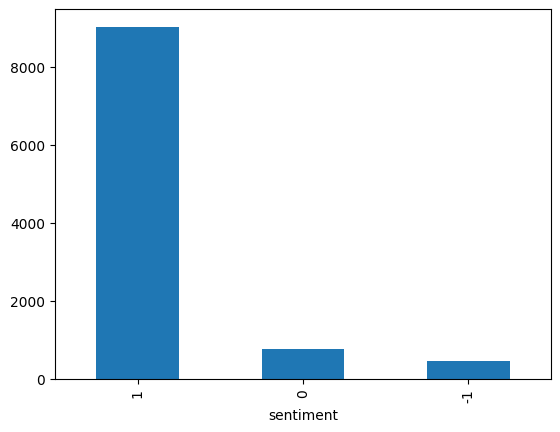

In [14]:
dataset["sentiment"].value_counts().plot(kind='bar')

Text Cleaning


In [16]:
def text_cleaning(text):
    text=text.lower()
    # text=text.translate(str.maketrans('', '',string.punctution))
    punc=str.maketrans(string.punctuation,' '*len(string.punctuation))
    text=text.translate(punc)

    text=re.sub(r'\d+', '',text)

    text=re.sub('https?://\S+|www\.\S+', '',text)

    text=re.sub('\n', '',text)
    return text

<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\S'
C:\Users\jaagr\AppData\Local\Temp\ipykernel_30420\1209751542.py:9: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub('https?://\S+|www\.\S+', '',text)


text processing
